<a href="https://colab.research.google.com/github/syedshubha/1MAT120/blob/main/Solution_MAT120Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <b> MAT 120 Lab Assignment Solution </b> </center>

---
<center> This is a sample answer. Any valid solution is acceptable. </center>


<b> Question 1: </b>
Consider the following function:
$$ f(x) = \{ {\begin{matrix}2sin(x+\pi/6), & x\geq 0\\ e^{x\sqrt{3}}, & x\leq 0 \end{matrix}}$$

<b> #Q1(a): </b> Plot $f(x)$ and $f'(x)$ for $x\in[-1,1]$. You cannot use manual differentiation.  

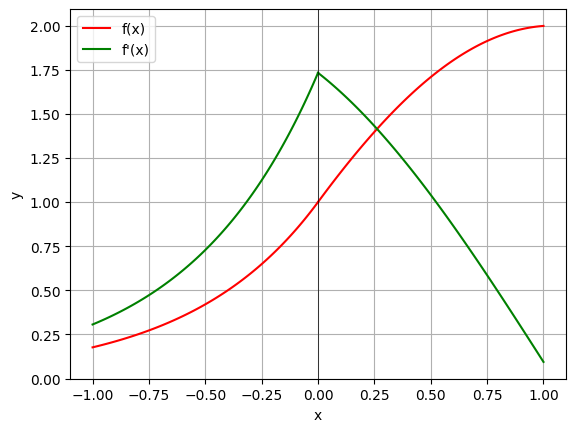

In [1]:
#Method-1: Without lambdify and piecewise
from numpy import *
from sympy import *
from matplotlib.pyplot import *
#intervals
interval1 = linspace(0,1,101)
interval2 = linspace(-1,0,101)
#defining functions and caclulating derivatives
x = symbols('x')
f1 = 2*sin(x + pi/6)
f2 = exp(sqrt(3)*x)
df1 = diff(f1, x)
df2 = diff(f2, x)

# values
f1_val = [f1.subs(x,i).evalf() for i in interval1]
f2_val = [f2.subs(x,i).evalf() for i in interval2]
df1_val = [df1.subs(x,i).evalf() for i in interval1]
df2_val = [df2.subs(x,i).evalf() for i in interval2]

#plot

plot(interval1, f1_val, 'r', label = "f(x)")
plot(interval1, df1_val, 'g', label = "f'(x)")
plot(interval2, f2_val, 'r')
plot(interval2, df2_val, 'g')


#axis
axhline(y=0, color='black', linewidth=0.5)
axvline(x=0, color='black', linewidth=0.5)
xlabel('x')
ylabel('y')
legend()
grid()

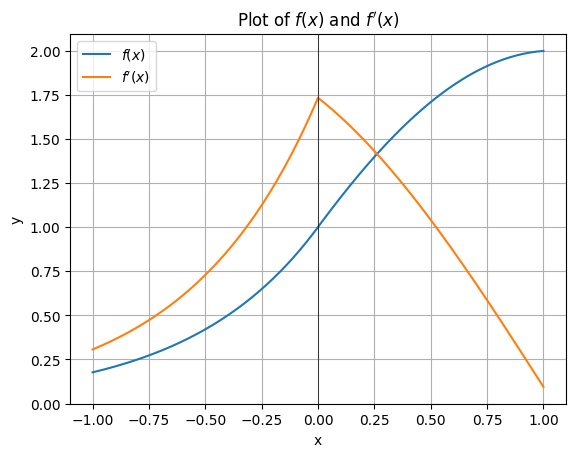

In [2]:
#Method-2: Using piecewise + lambdify

from numpy import *
from sympy import *
from matplotlib.pyplot import *
# Define the symbolic variable and functions
x = symbols('x')
f1 = 2 * sin(x + pi / 6)
f2 = exp(x * sqrt(3))

# Define f(x) using a piecewise function
f = Piecewise((f1, x >= 0), (f2, x < 0))

# Compute the derivative of f(x)
f_prime = diff(f, x)

# Convert symbolic expressions to numerical functions
f_lambdified = lambdify(x, f, 'numpy')
f_prime_lambdified = lambdify(x, f_prime, 'numpy')

# Define the range for x
x_vals = np.linspace(-1, 1, 201)

# Compute the values of f(x) and f'(x)
f_vals = f_lambdified(x_vals)
f_prime_vals = f_prime_lambdified(x_vals)


plot(x_vals, f_vals, label='$f(x)$')
plot(x_vals, f_prime_vals, label="$f'(x)$")

# Show x and y axes
axhline(y=0, color='black', linewidth=0.5)
axvline(x=0, color='black', linewidth=0.5)

# Adding labels and title
xlabel('x')
ylabel('y')
title('Plot of $f(x)$ and $f\'(x)$')

# Adding a legend
legend()
grid()
show()

<b> #Q1(b): </b> Calculate $\int_{-1}^{1}f(x)$ using trapezoid method, accurate upto 3 decimal points.

In [3]:
# Deleting x
try:
  del(x)
except:
  pass

from numpy import *
#trapezoid method
h , var = 1, 0
while True:
  #for -1<x<0
  n1 = int((0-(-1))/h)
  f1 = lambda x: exp(x*sqrt(3))
  #for 0<x<1
  n2 = int((1-0)/h)
  f2 = lambda x: 2*sin(x+pi/6)

  s1 , s2 = 0 , 0
  for i in range(n1):
    s1 = s1 + h*(f1(-1+i*h)+ f1(-1+i*h + h))/2
  for i in range(n2):
    s2 = s2 + h*(f2(i*h)+ f2(i*h + h))/2
  s = s1 + s2
  if (abs(s-var)<1e-3): #accurate upto 3 decimal
    print(round(s,3))
    break
  h = h/10
  var = s

2.113


<b> Question 2: </b>
Consider the following ODE:
$$ y''' + y'' - y' - y = 0  $$
$$ y''(0) = -1, y'(0)= -3, y(0) = 7 $$

<b> Q2(a): </b> Solve the ODE using Euler's method

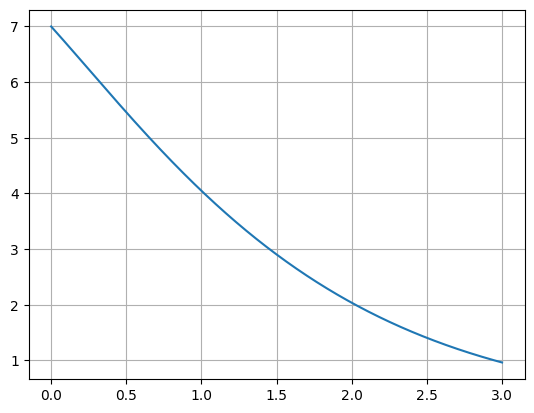

In [4]:
x = linspace(0,3,3001)
h = (3-0)/(3001-1)
y = 0*x
v = 0*x # y'= v
w = 0*x # v' = w = y"
w[0], v[0], y[0] = -1, -3, 7
for i in range(1, 3001):
  w[i] = w[i-1] + h*(-w[i-1]+ v[i-1] + y[i-1]) # w'= -y"+y'+y
  v[i] = v[i-1] + h*(w[i])
  y[i] = y[i-1] + h*(v[i])
plot(x,y)
grid()

<b>Q2(b): </b> Solve the ODE using sympy

In [5]:
from sympy import *
x = symbols('x')
y = Function('y')(x)
expr = Eq(diff(y,x,3)+ diff(y,x,2), diff(y,x)+y)
boundary = {diff(y,x,2).subs(x,0): -1, diff(y,x).subs(x,0): -3, y.subs(x,0): 7}
solution = dsolve(expr, ics = boundary)
display(solution)

Eq(y(x), (4*x + 7)*exp(-x))

#### That's it! But still let's see if our previous graph was correct.

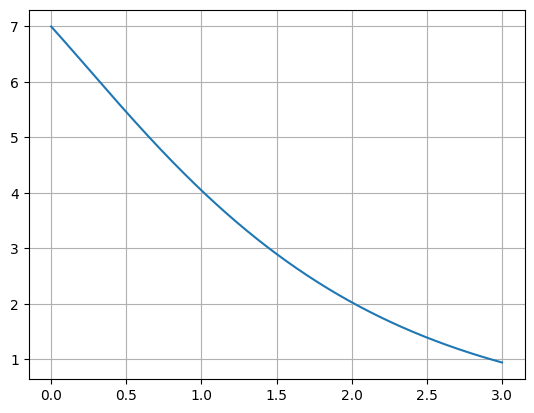

In [6]:
from matplotlib.pyplot import *
x_val = linspace(0,3,3001)
y = solution.rhs
f = lambdify(x, y, "numpy")
plot(x_val, f(x_val))
grid()